# Data Analysis

### 1. Importing the Necessary Libraries

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy.stats as stats
import pylab
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
df = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\data\\raw data\\heart.csv")
# visualizing the data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# shape of the data
df.shape

(303, 14)

In [4]:

# general info including the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# column names
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
# number of categorical columns
len(df.select_dtypes("object").columns)

0

There is no categorical column in the dataset, all features in the dataset are numerical.

In [7]:
# statistical summary for the numerical columns
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 2.Data Analysis
### 2.1 Numerical Variables
Now let's divide Numerical variables to
1. discrete numerical variables (unique values less than 20)
2. continous numerical variables.

#### 2.1.1 Discrete Variables

In [8]:
# let's mask out discrete variables
disc_vars = [var for var in df.columns if df[var].nunique() < 20]
disc_vars

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [9]:
# number of discrete variables
len(disc_vars)

9

In [10]:
# let's visualize the discrete columns data
df[disc_vars].head()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


##### 2.1.1.1 Missing Values

In [11]:
# let's check if there are any missing values in the discrete variables data
df[disc_vars].isnull().sum()

sex        0
cp         0
fbs        0
restecg    0
exng       0
slp        0
caa        0
thall      0
output     0
dtype: int64

There are no missing values in the discrete variables.

##### 2.1.1.2. Distribution of Discrete Numerical Variables

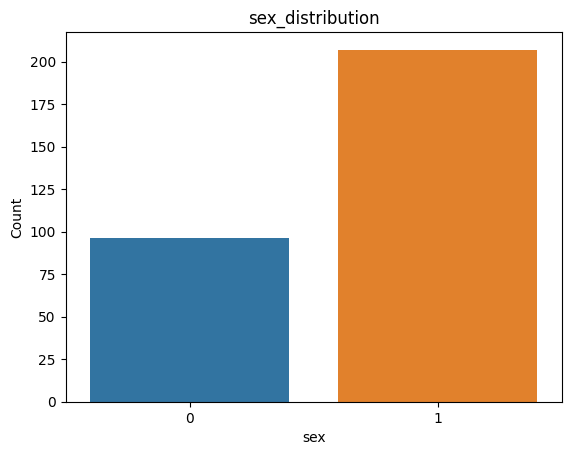

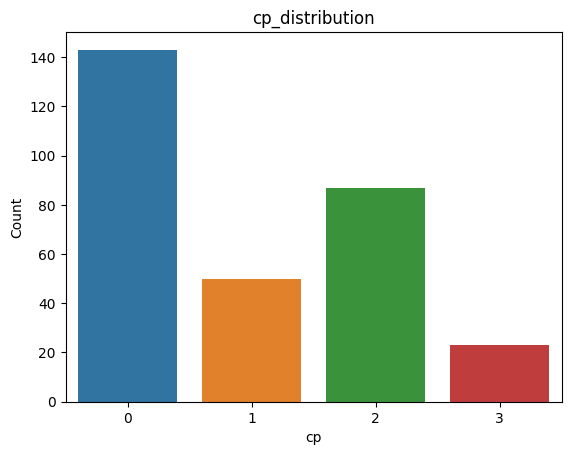

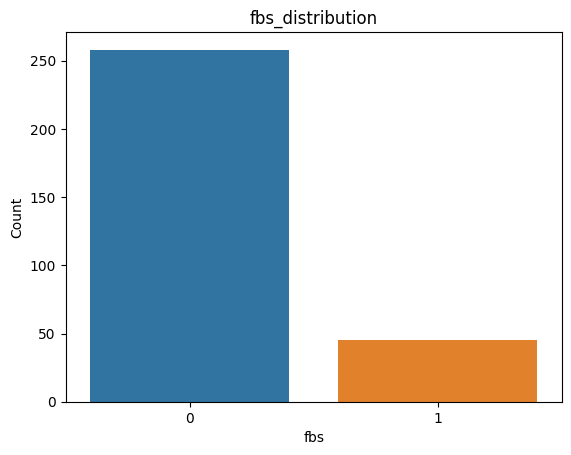

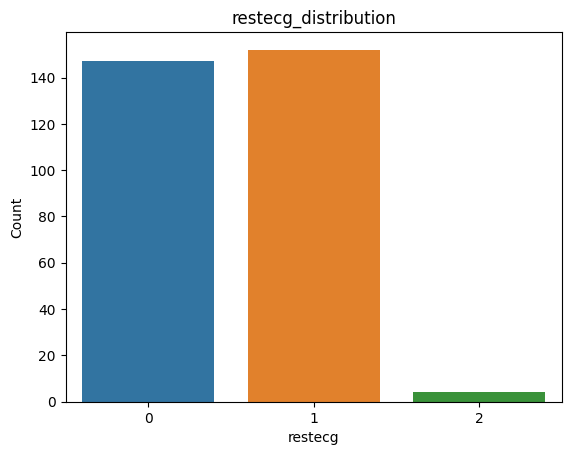

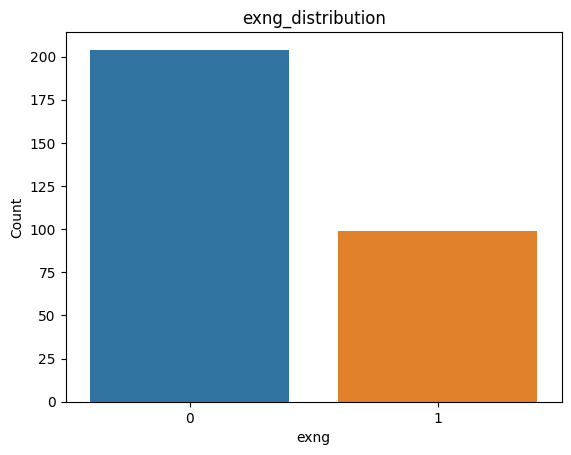

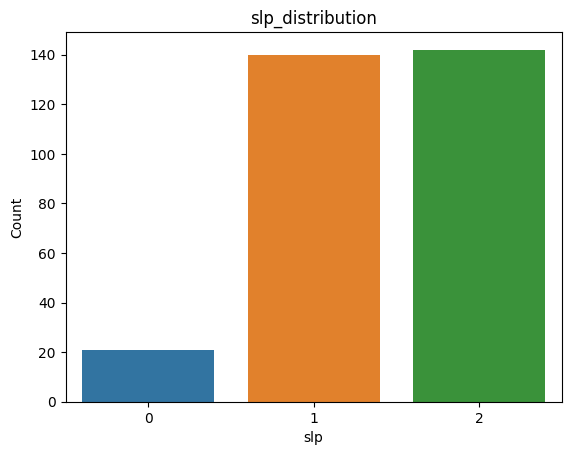

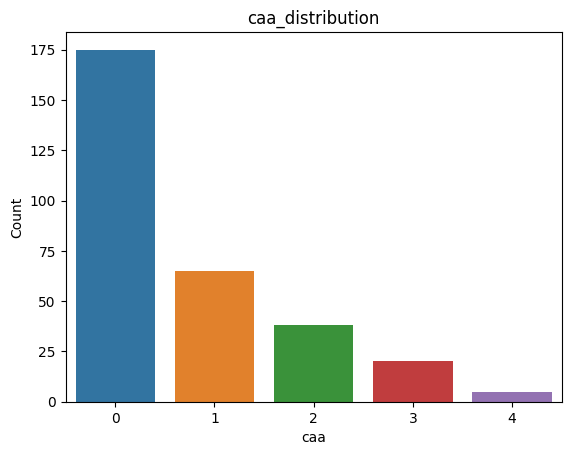

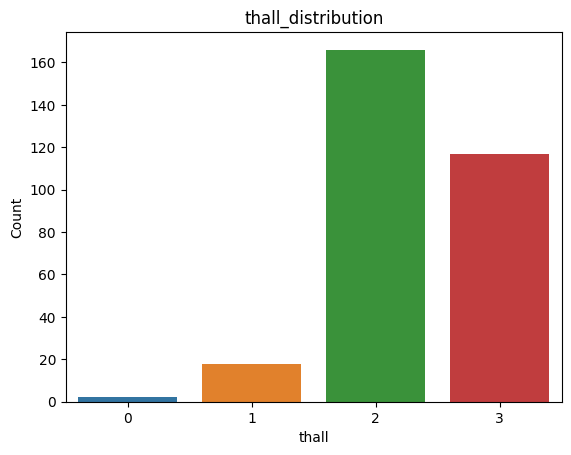

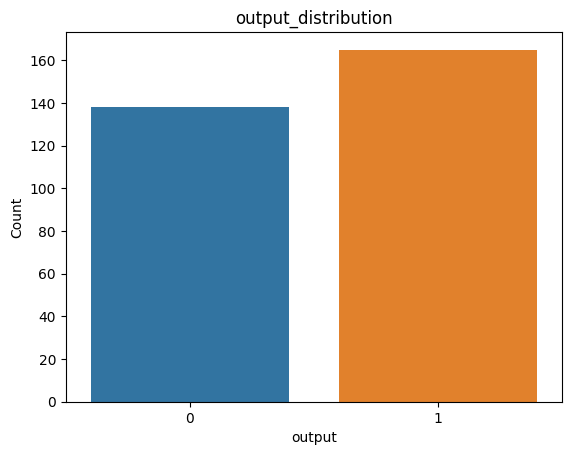

In [12]:
# now let's see the distribution of the discrete variables
for var in disc_vars:
    sns.countplot(data = df, x = df[var])
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.title(var + "_distribution")
    plt.savefig(f"C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\reports\\figure\\discrete_variables_plot\\{var} _distribution.jpg")
    plt.show()

From the above plot we can conclude that
1. the data have more male patients data.
- 0 Female
- 1 Male

2. the chest pain (cp) feature have more 0 and  moderate 2 values 
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

3. the fbs : fasting blood sugar: have more of 0 
- 0: (fasting blood sugar > 120 mg/dl) = True
- 1: (fasting blood sugar > 120 mg/dl) = False

4. rest_ecg : resting electrocardiographic results have more of 0 and 1 and too low 2
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.

5. exang stands for "exercise induced angina.": and the dataset have more of 0 features.
- 1: Yes (the patient experiences exercise-induced angina)
- 0: No (the patient does not experience exercise-induced angina)

6. slp: slope of peak exercise ST segment , have more 1 and 2 values and rare 0 value counts.
- 0 : Upsloping
- 1 : Flat
- 2 : Downsloping

7. caa: number of major vessels colored by fluoroscopy. this feature have more of 0 values and moderate 1 and 2 values respectively.
- 0: No major vessels colored
- 1: One major vessel colored
- 2: Two major vessels colored
- 3: Three major vessels colored
- 4: four major vessels colored

8.  thall : "thalassemia".
- 3: Normal
- 6: Fixed defect (indicating a permanent defect in the heart tissue, possibly due to past myocardial infarction)
- 7: Reversible defect (indicating that the defect in the heart tissue is temporary, possibly due to ischemia during the stress test)

9. output: Heart disease indicator, the dataset contains more patients with heart disease.
- 1: Presence of heart disease
- 0: Absence of heart disease 


#### 2.1.2 Continous Varaibles

In [13]:
# first let's mask the continous numerical variables
cont_vars = [var for var in df.columns if df[var].nunique() > 20]
cont_vars

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [14]:
# number of continous numerical columns
len(cont_vars)

5

##### 2.1.2.1 Missing Values

In [15]:
# let's mask variable names in continous variables columns if there are any missing values in the continous variables
[var for var in cont_vars if df[var].isnull().sum() > 0]

[]

There are no missing values in the continous variables list

##### 2.1.2.2 Distribution of Continous Variables

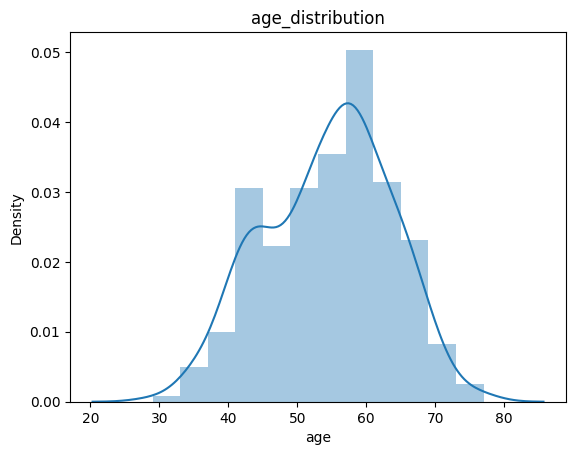

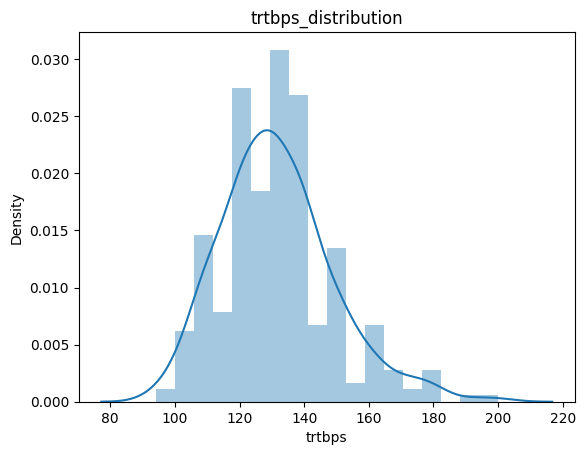

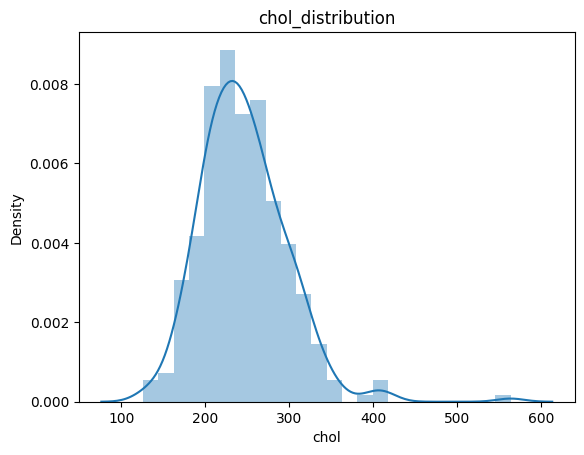

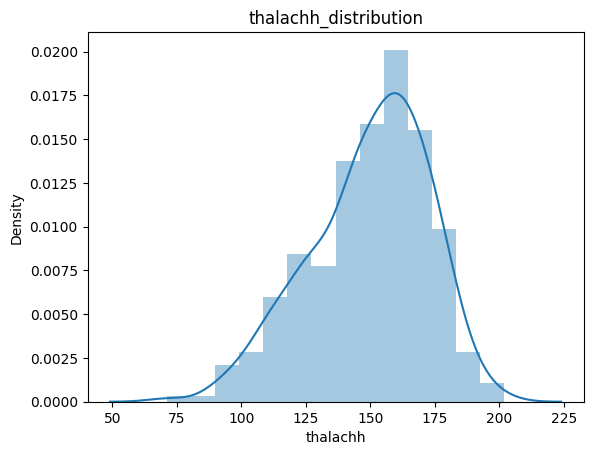

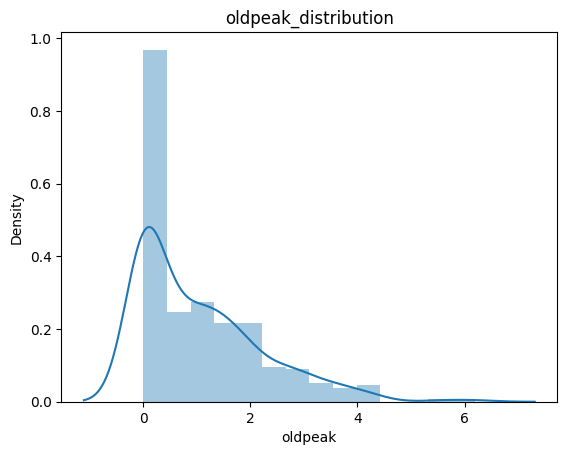

In [16]:
# let's see the distribution of this continous variables
for var in cont_vars:
    sns.distplot(df[var])
    plt.title(var + "_distribution")
    plt.savefig(f"C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\reports\\figure\\continous_variables_distribution\\{var}_distribution.jpg")
    plt.show()

From the above plot we can see that:
1. The Age features distribution roughly resembles a gaussian distribution(normal distribution).
2. trtbps also resembles a rough gaussian distribution
2. the chol (serum cholesterol level) feature is right skewed (or long tail in the right)
3. thalachh feature resembles a rough normal distribution.
4. the oldpeak varaible is right skewed.

##### 2.1.2.3 Gaussian Transformation

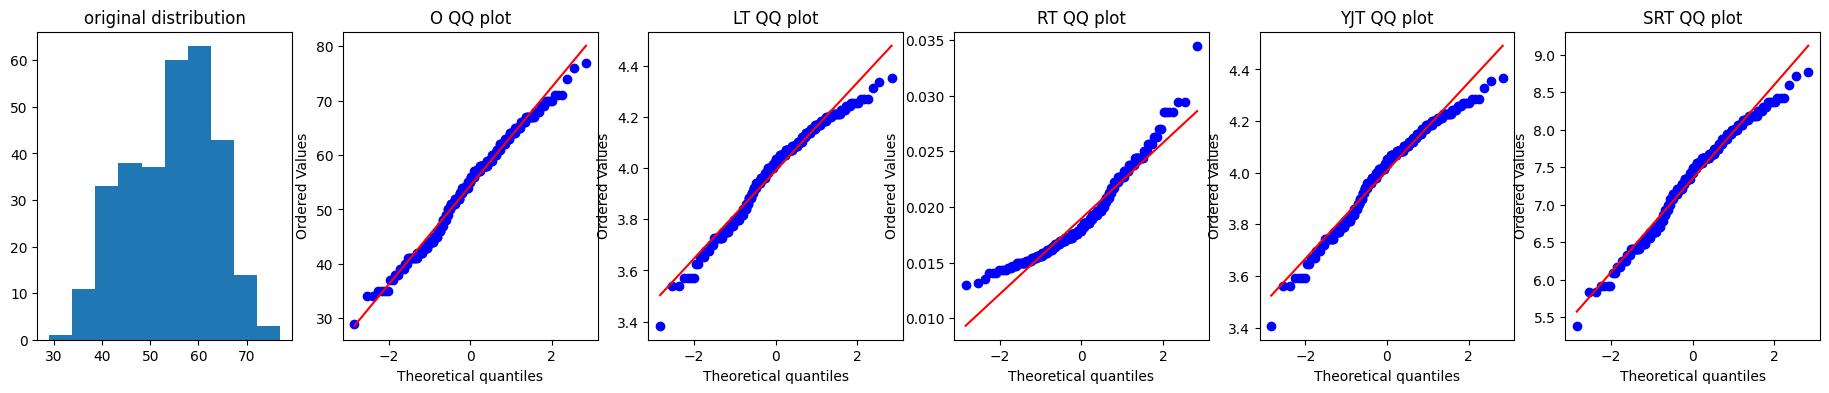

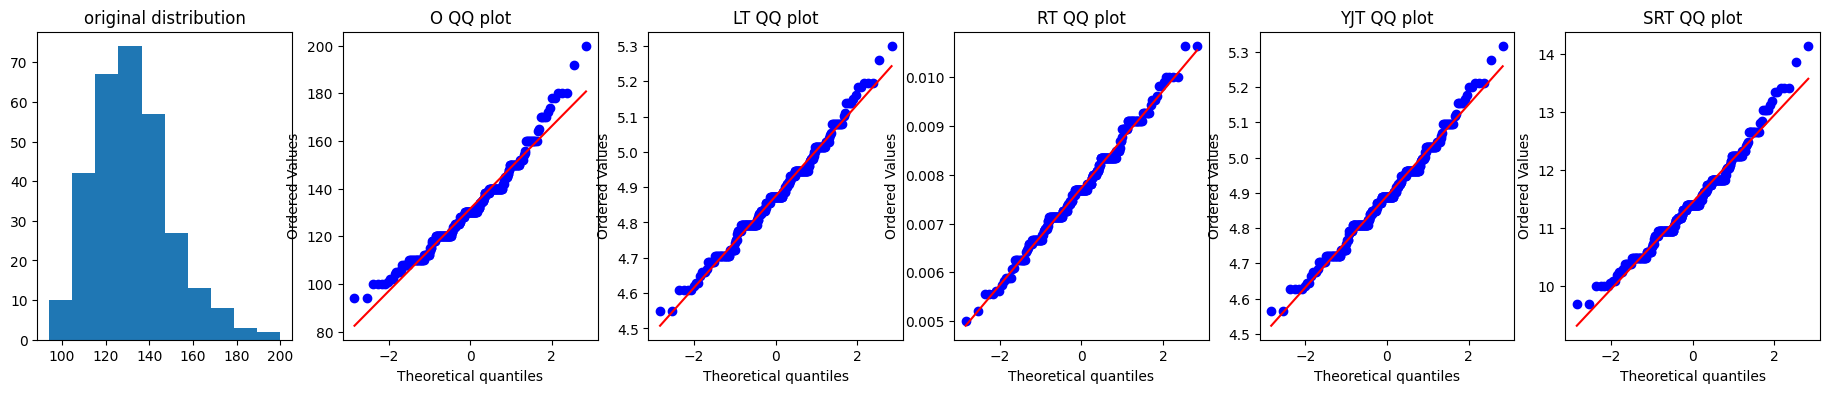

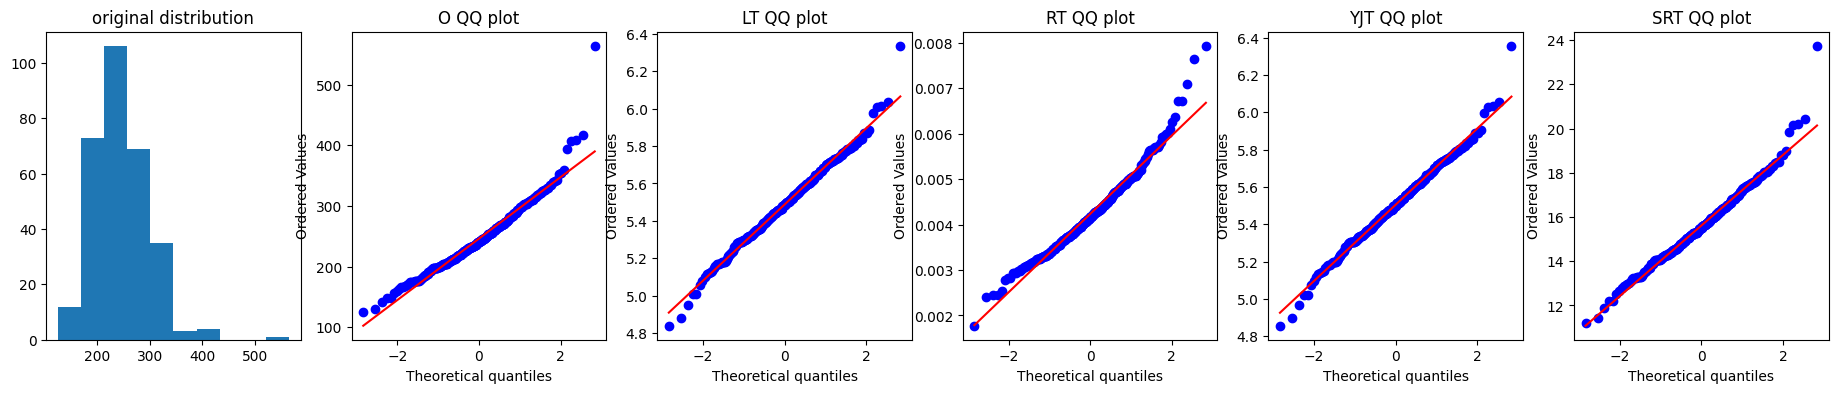

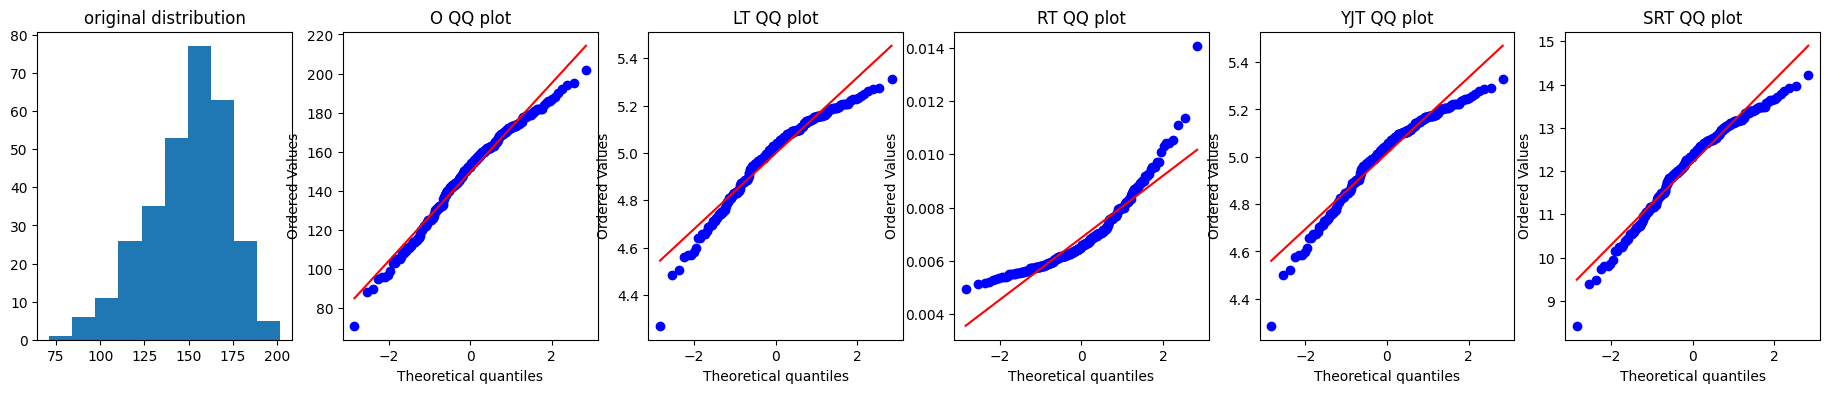

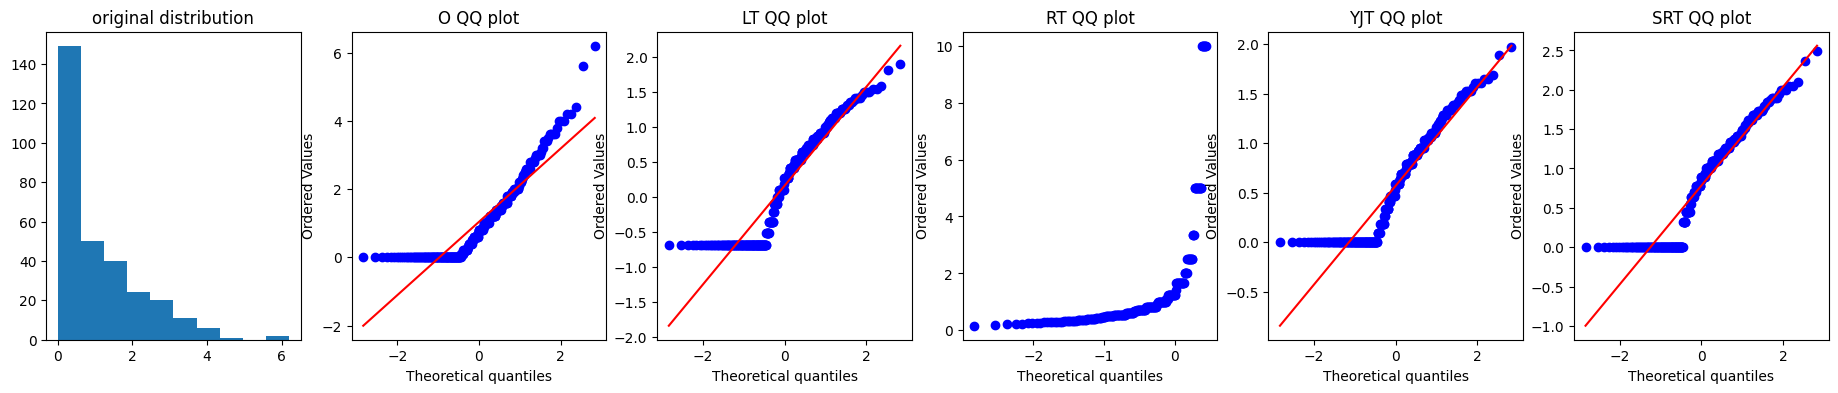

In [17]:
# Now let's plot the qq plot to see which transformation 
# log
# reciprocal
# yeo jhonson
# square root   # to see the more gaussian looking distribution using qq plot.
for var in cont_vars:
    plt.figure(figsize=(23,4))
    plt.subplot(1,6,1)
    plt.hist(df[var])
    plt.title("original distribution")
    
    plt.subplot(1,6,2)
    stats.probplot(df[var],dist = "norm", plot = pylab )
    plt.title("O QQ plot")
    
    plt.subplot(1,6,3)
    stats.probplot(np.log(df[var]+ 0.5), dist = "norm", plot = pylab)
    plt.title("LT QQ plot")
    
    plt.subplot(1,6,4)
    stats.probplot(1/(df[var]), dist="norm", plot = pylab)
    plt.title("RT QQ plot")
    
    plt.subplot(1,6,5)
    stats.probplot(stats.yeojohnson(df[var], lmbda= 0.001),dist = "norm", plot = pylab)
    plt.title("YJT QQ plot")
    
    plt.subplot(1,6,6)
    stats.probplot(df[var]**(0.5), dist = "norm", plot = pylab)
    plt.title("SRT QQ plot")
    
    out_path = "C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\reports\\figure\\cont_vars_qq_plot"
    
    plt.savefig(os.path.join(out_path,f"{var}_QQplot.jpg"))
    plt.show()

From the above plot we can see that we have to apply for 
1. age - no transformation
2. trtbps - reciprocal transformation
3. chol - yeo johnson transformation
4. thalachh - no transformation
5. oldpeak - no transformation 

##### 2.1.2.4 Outliers

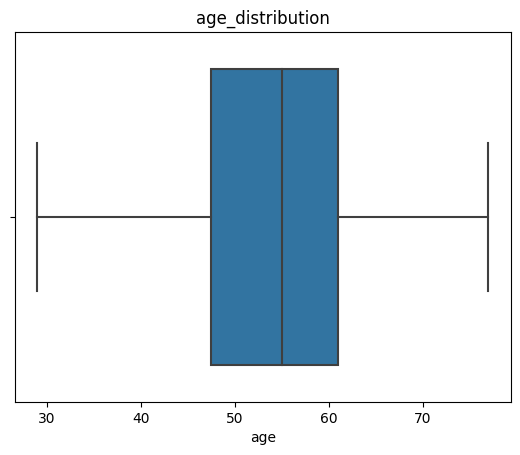

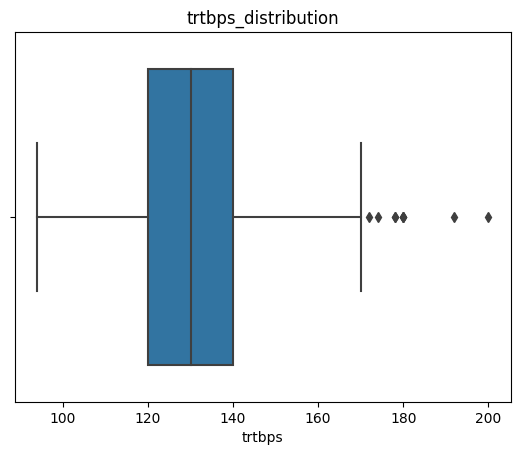

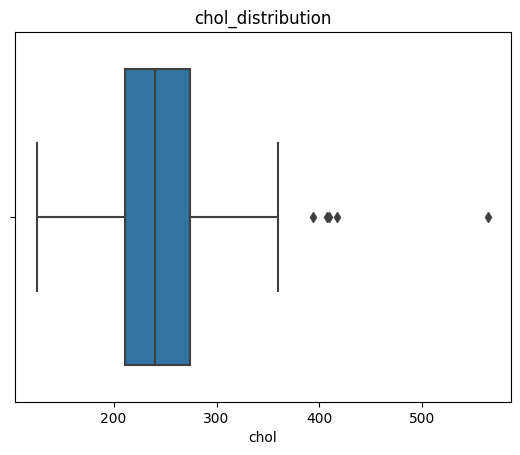

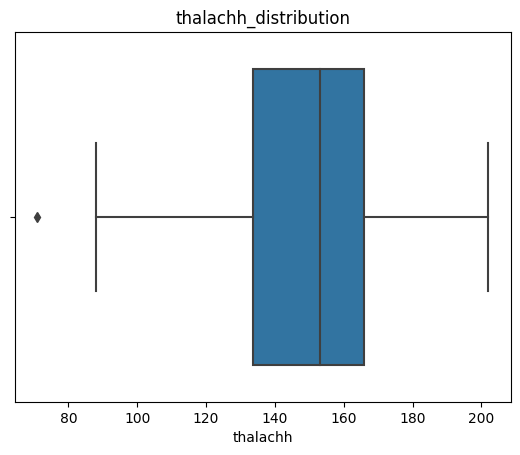

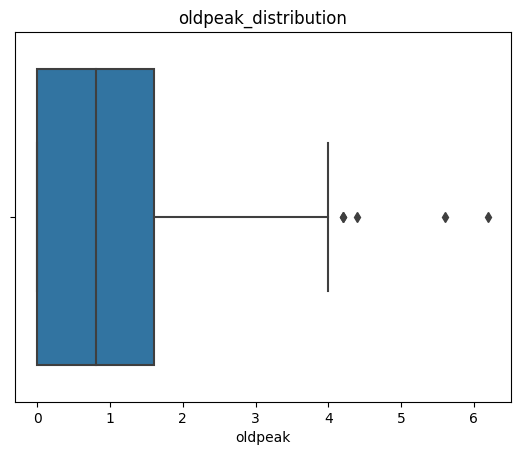

In [18]:
# let's see the outliers in each continous variables using box plot
for var in cont_vars:
    sns.boxplot(data = df, x = df[var])
    plt.title(var + "_distribution")
    out_path = "C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\reports\\figure\\cont_vars_outliers"
    plt.savefig(os.path.join(out_path,f"{var}_.jpg"))
    plt.show()

From the above boxplot's we can see that except  for the age variable all the other columns have some outliers records which we can ignore , or that does not have a remarkable impact in our model performance.

### 2.2 Correlation Analysis

In [19]:
# let's see the correlation matrix between all our numerical variables
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


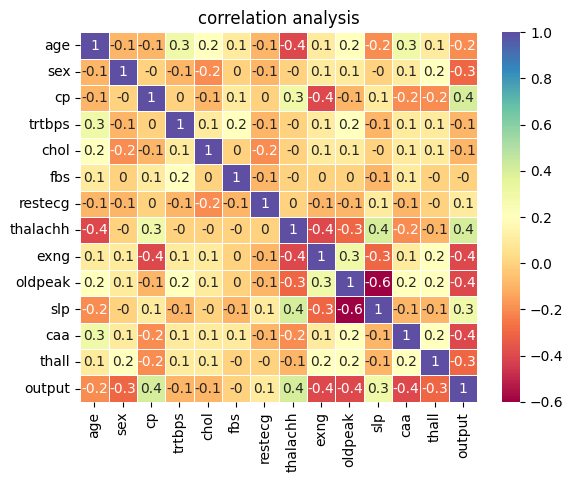

In [20]:
# let's plot the heat map of the above correlation matrix

sns.heatmap(df.corr().round(1), cmap = "Spectral", linewidths=0.5, annot=True)
plt.title("correlation analysis")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\reports\\figure\\correlation_analysis.jpg")
plt.show()

##### Key Observations:

1. *Strong Positive Correlations:*
   - `cp` (chest pain type) and `output` (presence of heart disease): 0.433798
   - `thalachh` (maximum heart rate achieved) and `output`: 0.421741
   - `cp` and `thalachh`: 0.295762
   - `slp` (slope of the peak exercise ST segment) and `output`: 0.345877

2. *Strong Negative Correlations:*
   - `exng` (exercise induced angina) and `output`: -0.436757
   - `oldpeak` (ST depression induced by exercise relative to rest) and `output`: -0.430696
   - `exng` and `thalachh`: -0.378812

3. *Moderate Correlations:*
   - `age` and `trtbps` (resting blood pressure): 0.279351
   - `age` and `caa` (number of major vessels colored by fluoroscopy): 0.276326
   - `oldpeak` and `exng`: 0.288223
   - `thalachh` and `slp`: 0.386784

4. *Weak or No Correlations:*
   - Many pairs of variables show weak or no significant correlation, such as `age` and `sex` (-0.098447), `chol` (cholesterol) and `restecg` (resting electrocardiographic results) (-0.151040), etc.

**Implications for Heart Disease Prediction:**

- **Important Predictors:**
  - `cp` (chest pain type), `thalachh` (maximum heart rate achieved), `exng` (exercise induced angina), `oldpeak`, and `slp` are highly correlated with `output`. This suggests that these features could be significant predictors of heart disease presence.
  
- **Less Significant Predictors:**
  - Features such as `fbs` (fasting blood sugar), `restecg`, and `chol` show weak correlations with `output`, implying they may be less impactful in predicting heart disease in this dataset.

- **Multicollinearity Considerations:**
  - High correlation between independent variables (like `thalachh` and `slp`) might indicate multicollinearity, which can affect the performance of some models. Techniques such as PCA (Principal Component Analysis) or dropping one of the correlated features can be considered.

- **Transformation and Interaction:**
  - Variables with weak correlations might still be useful if they interact with other variables. Feature engineering techniques can explore transformations and interaction terms to uncover hidden patterns.